In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
filePath = ''
    
exerciseData = pd.read_csv(filePath) 
exerciseData = exerciseData.fillna(0)

In [3]:
exerciseDataScaled = exerciseData.drop(columns=['Date','Activity','Session','Weather Wind (m/s)','Weather Temp ','Injury (Comment)','Comment','Blood presure','Sick Binary',])
scaler = StandardScaler()
exerciseDataScaled = scaler.fit_transform(exerciseDataScaled)

Scale the data before doing exploration

In [4]:
pca = PCA(n_components=3)
pca_Comp_scaled = pca.fit_transform(exerciseDataScaled)
PCA_ratio = pca.explained_variance_ratio_
print(PCA_ratio.cumsum())

[0.25252846 0.37008549 0.47207939]


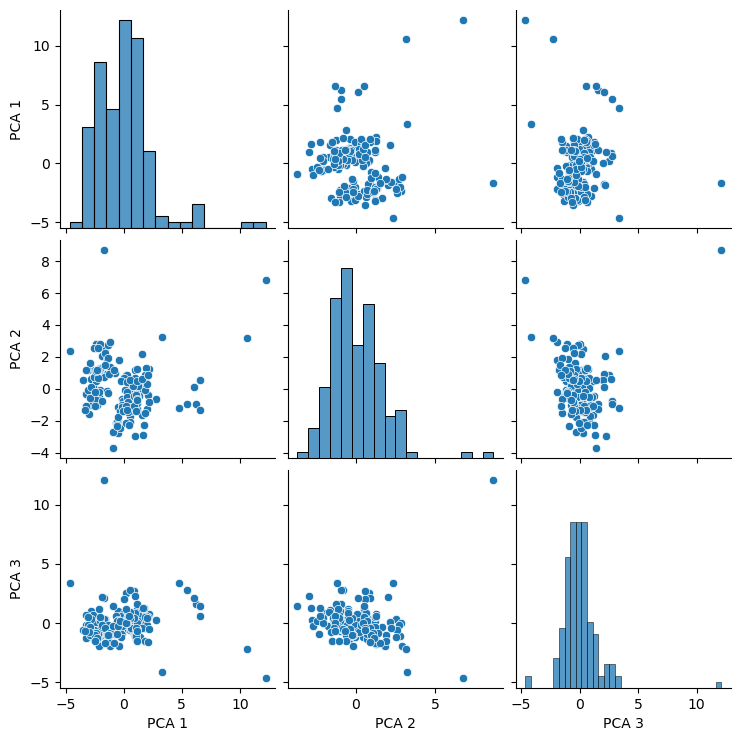

In [5]:
PCA_comp_df = pd.DataFrame(pca_Comp_scaled, columns = ["PCA comp 1", "PCA comp 2", "PCA comp 3"])    
Feature_vector = ["PCA" + str(num+1) for num in range(len(PCA_ratio))]
X_df = pd.DataFrame(pca_Comp_scaled, columns = Feature_vector)
col = ["PCA 1", "PCA 2", "PCA 3"]
pca_Comp_scaled = pd.DataFrame(pca_Comp_scaled, columns=col)
sns.pairplot(pca_Comp_scaled)

The three first PCA components combined describe 44.8 % of the variation in the data and 22.8 % is described by the first PCA component. Visualized above we can see that the first three PCA components are visualized as separate clusters but still 44.8 % is to small of an explanation of the full data variance to take this method any further for this dataset. 

In [6]:
exerciseData.drop(exerciseData[exerciseData['Total load'] == 0].index, inplace = True)
exerciseData = exerciseData.rename({'Lenght (min) - active time (excluding rest in intervals)': 'Active time'}, axis='columns')
exerciseData = exerciseData.rename({'Average HR, including rest for intervals': 'Average HR'}, axis='columns')

date = exerciseData['Date']
activity = exerciseData['Activity']
zon = exerciseData['Zon']
intensity = exerciseData['Intensity (1-10)']
distanceKM = exerciseData['Length (km)']
timeEndurance = exerciseData['Active time']
timeTotal = exerciseData['Lenght (min - tot)']
totalLoad = exerciseData['Total load']
maxHR = exerciseData['Max HR']
averageHR = exerciseData['Average HR']
readinessFeeling = exerciseData['Readiness feeling']
restingHRLowest = exerciseData['Resting HR (lowest)']
restingHRAverage = exerciseData['Resting HR (average)']
sleepScore = exerciseData['Sleep score (oura)']
HRV = exerciseData['HRV (oura)']
readinessOura = exerciseData['Readiness (oura)']
stress = exerciseData['Stress']
motivation = exerciseData['Motivation']
weight = exerciseData['Weight']
injury = exerciseData['Injury (1-10)']
food = exerciseData['Food (1-10)']  

In [7]:
zonTime = pd.concat([zon, timeEndurance], axis=1)
zonTime = zonTime.astype({"Zon":"int"})
minZon1WeeklyAdded = 70
minPerHour = 60

In [8]:
numberOfWeeks = round(len(zonTime)/7)
addedTimeZon1 = numberOfWeeks*(minZon1WeeklyAdded/minPerHour)

totSum = zonTime.groupby("Zon").sum()
totHours = totSum/minPerHour
totHours.loc[1] += addedTimeZon1

normalizer = totHours.sum()
totHoursPercentage = totHours/normalizer

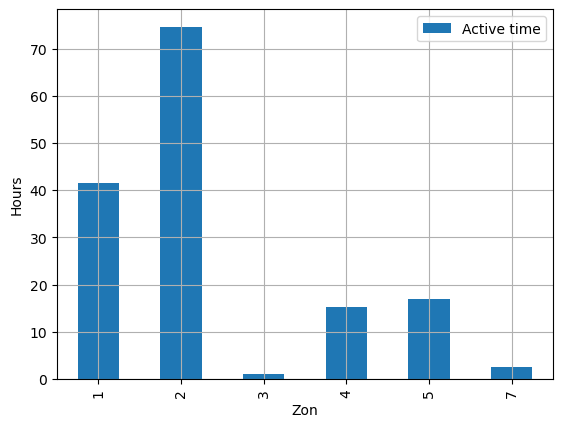

In [9]:
hist = totHours.plot.bar()
plt.xlabel('Zon')
plt.ylabel('Hours')
plt.grid()
    

Number of hours in the different endurance zones. Distribution indicate a polarized training method. 

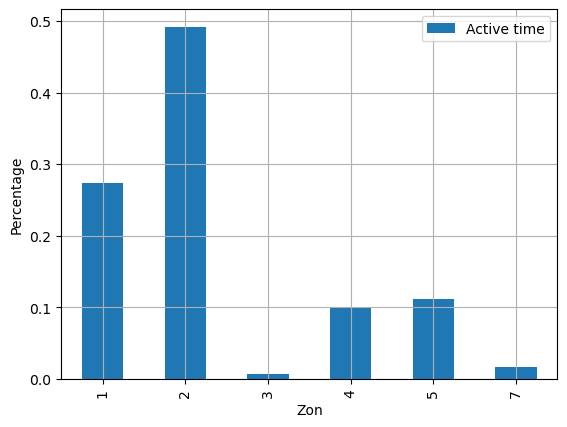

In [10]:
hist = totHoursPercentage.plot.bar()
plt.xlabel('Zon')
plt.ylabel('Percentage')
plt.grid()

Percentages of endurance training in the different endurance zones - polarized training method

[Text(0.5, 1.0, 'Heat map of health variables - Pearson Correlations')]

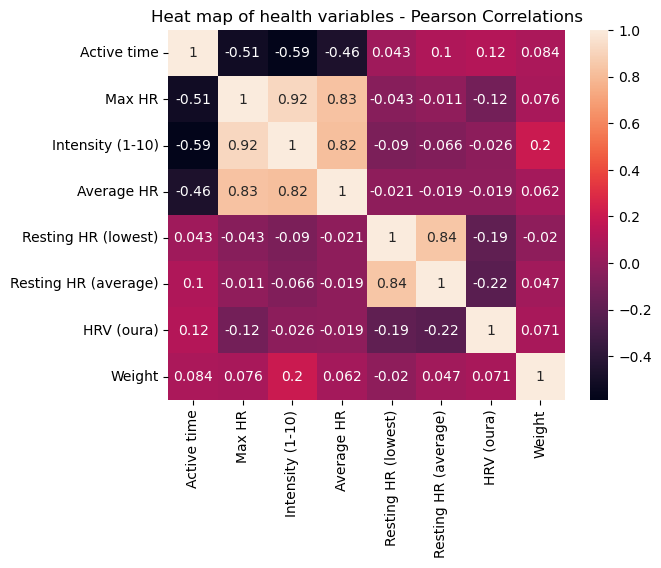

In [11]:
plt.figure()
correlationsData = pd.concat([timeEndurance, maxHR, intensity, averageHR, restingHRLowest, restingHRAverage, HRV, weight], axis =1)
correlations = correlationsData.corr()
sns.heatmap(correlations, annot=True).set(title='Heat map of health variables - Pearson Correlations')


Heat map representing the correlation between the most interesting variables. Notable correlations: weight have a weak positive correlation with active time, intensity and max HR - counterintuitive but would be explained by an increased food and fluid consumption on the really hard days. Resting HR average and resting HR lowest show a strong correlation since they basically measure the same thing but resting HR average show an overall stronger correlation with other variables, which make sense since it describes the full night and lowest resting HR can sometimes just be noise in the Oura ring measurement. Max HR show a weak negative correlation to HRV - higher training intensity generates a higher stress on the parasympathetic nervous system (not showing in the intensity correlation) but the inverse seems to be true for active time; longer total exercise time resulting have a weak positive correlation to HRV. The correlations are weak but this would indicate that high intensity training taxes the parasympathetic nervous system more than longer low intensity training - see correlation between active time and max HR and active time and intensity, where both are negative. As excepted, resting HR and HRV has an inverse correlation, both measurement at recovery and overall heart health.  

In [12]:
dateVector = date.to_numpy().reshape(-1, 1)
activityVector = activity.to_numpy().reshape(-1, 1)
zonVector = zon.to_numpy().reshape(-1, 1)
intensityVector = intensity.to_numpy().reshape(-1, 1)
distanceKMVector = distanceKM.to_numpy().reshape(-1, 1)
timeEnduranceVector = timeEndurance.to_numpy().reshape(-1, 1)
timeTotalVector = timeTotal.to_numpy().reshape(-1, 1)
totalLoadVector = totalLoad.to_numpy().reshape(-1, 1)
readinessFeelingVector = readinessFeeling.to_numpy().reshape(-1, 1)
readinessOuraVector = readinessOura.to_numpy().reshape(-1, 1)
motivationVector = motivation.to_numpy().reshape(-1, 1)
maxHRVector = maxHR.to_numpy().reshape(-1, 1)
averageHRVector = averageHR.to_numpy().reshape(-1, 1)
restingHRLowestVector = restingHRLowest.to_numpy().reshape(-1, 1)
restingHRAveragevector = restingHRAverage.to_numpy().reshape(-1, 1)
HRVVector = HRV.to_numpy().reshape(-1, 1)
stressVector = stress.to_numpy().reshape(-1, 1)
weightVector = weight.to_numpy().reshape(-1, 1)
injuryVector = injury.to_numpy().reshape(-1, 1)
foodVector = food.to_numpy().reshape(-1, 1)

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np


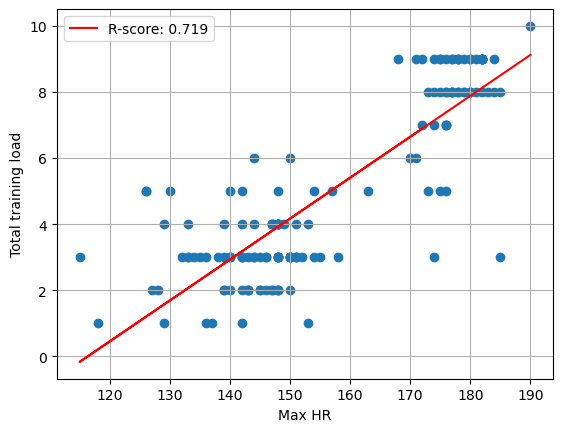

In [14]:

clf = LinearRegression()
clf.fit(maxHRVector, totalLoadVector)
rScore = np.around(clf.score(maxHRVector, totalLoadVector),3)

maxHRVectorFlat = maxHRVector.flatten()
x, m = np.polyfit(maxHRVectorFlat, totalLoadVector, 1)
plt.figure()
plt.plot(maxHRVectorFlat, x*maxHRVectorFlat+m,'r',label=f"R-score: {rScore}")
plt.scatter(maxHRVector, totalLoadVector)
plt.xlabel("Max HR")
plt.ylabel("Total training load")
plt.legend()
plt.grid()


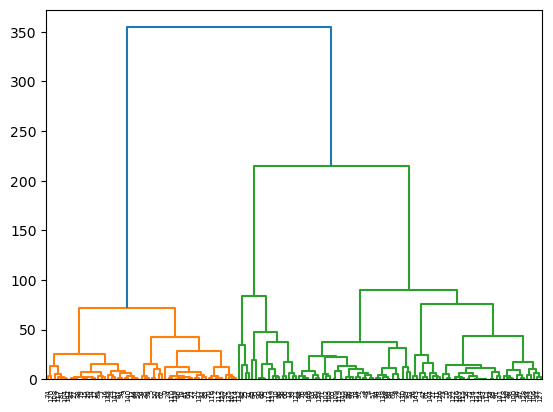

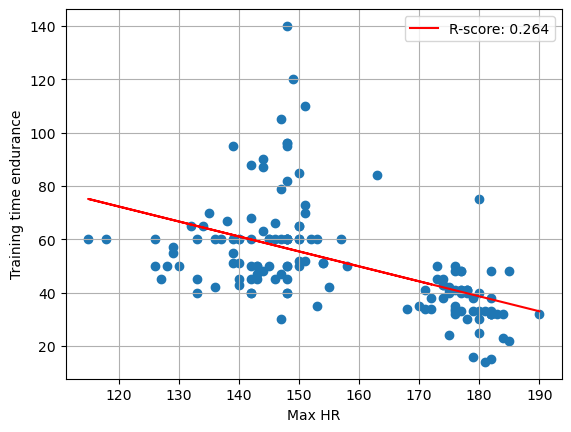

In [15]:
ClusterData = exerciseData[['Max HR','Active time']]

plt.figure()
linkage_data = linkage(ClusterData, method='ward', metric='euclidean')
dendrogram(linkage_data)

clf = LinearRegression()
clf.fit(maxHRVector, timeEnduranceVector)
rScore = np.around(clf.score(maxHRVector, timeEnduranceVector),3)


x, m = np.polyfit(maxHRVectorFlat, timeEnduranceVector, 1)
plt.figure()
plt.plot(maxHRVectorFlat, x*maxHRVectorFlat+m,'r',label=f"R-score: {rScore}")
plt.scatter(maxHRVectorFlat, timeEnduranceVector)
plt.xlabel("Max HR")
plt.ylabel("Training time endurance")
plt.legend()
plt.grid()


Comparing the time and max HR - where shorter time tends to be for lower HR. We can see the trend and two (potentially three) clusters, when we look at the time for endurance per each session and compare that to max HR during that session. Overall this further aligns with the applied polarized training method.

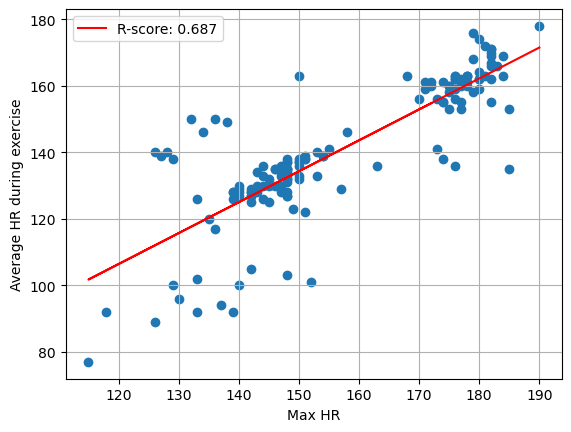

In [16]:
clf = LinearRegression()
clf.fit(maxHRVector, averageHRVector)
rScore = np.around(clf.score(maxHRVector, averageHRVector),3)


x, m = np.polyfit(maxHRVectorFlat, averageHRVector, 1)
plt.figure()
plt.plot(maxHRVectorFlat, x*maxHRVectorFlat+m,'r',label=f"R-score: {rScore}")
plt.scatter(maxHRVector, averageHRVector)
plt.xlabel("Max HR")
plt.ylabel("Average HR during exercise")
plt.legend()
plt.grid()


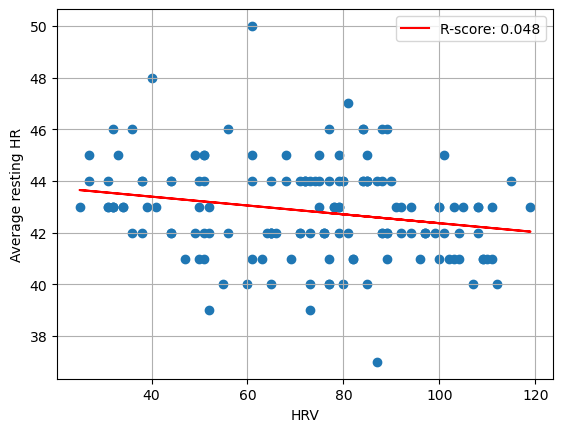

In [17]:
HRVVectorFlat = HRVVector.flatten()
clf = LinearRegression()
clf.fit(HRVVector, restingHRAveragevector)
rScore = np.around(clf.score(HRVVector, restingHRAveragevector),3)

x, m = np.polyfit(HRVVectorFlat, restingHRAveragevector, 1)
plt.figure()
plt.plot(HRVVectorFlat, x*HRVVectorFlat+m,'r', label=f"R-score: {rScore}")
plt.scatter(HRVVectorFlat, restingHRAveragevector)
plt.xlabel("HRV")
plt.ylabel("Average resting HR")
plt.legend()
plt.grid()

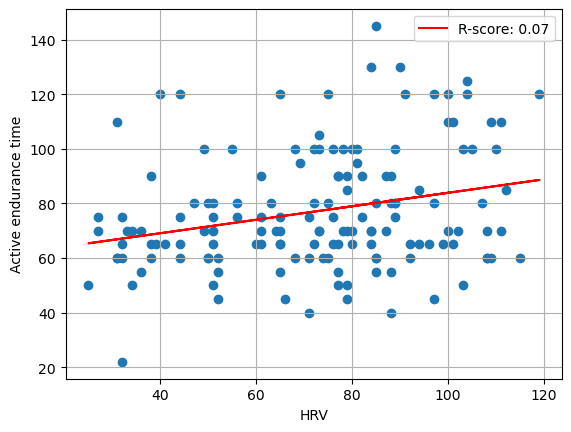

In [18]:

clf = LinearRegression()
clf.fit(HRVVector, timeTotalVector)
rScore = np.around(clf.score(HRVVector, timeTotalVector),3)

x, m = np.polyfit(HRVVectorFlat, timeTotalVector, 1)
plt.figure()
plt.plot(HRVVectorFlat, x*HRVVectorFlat+m,'r', label=f"R-score: {rScore}")
plt.scatter(HRVVectorFlat, timeTotalVector)
plt.xlabel("HRV")
plt.ylabel("Active endurance time")
plt.legend()
plt.grid()


In [19]:
numberOfWeeks = round(len(distanceKM)/7)
oneWeek = 7

weeklyKM = []
weeklyRestingHRLowest = []
weeklyRestingHRAverage = []
weeklyIntensity = []
weeklyTimeEndurance = []
weeklyHRV = []
weeklyWeight = []
weeklyTotalTime = []
weeklySleep = []


firstWeekKM = distanceKM[0:7].sum()
firstRestingHRLowest = restingHRLowest[0:7].sum()/oneWeek
firstRestingHRAverage = restingHRAverage[0:7].sum()/oneWeek
firstIntensity = intensity[0:7].sum()/oneWeek
firstTimeEndurance = timeEndurance[0:7].sum()
firstHRV = HRV[0:7].sum()/oneWeek
firstWeight = weight[0:7].sum()/oneWeek
firstTotalTime = timeTotal[0:7].sum()
firstSleep = sleepScore[0:7].sum()/oneWeek

for i in range(2*oneWeek, round(len(distanceKM)), oneWeek): 


    weeklyKM.append(distanceKM[i-oneWeek:i].sum())
    weeklyRestingHRLowest.append(restingHRLowest[i-oneWeek:i].sum()/oneWeek)
    weeklyRestingHRAverage.append(restingHRAverage[i-oneWeek:i].sum()/oneWeek)
    weeklyIntensity.append(intensity[i-oneWeek:i].sum()/oneWeek)
    weeklyTimeEndurance.append(timeEndurance[i-oneWeek:i].sum())
    weeklyHRV.append(HRV[i-oneWeek:i].sum()/oneWeek)
    weeklyWeight.append(weight[i-oneWeek:i].sum()/oneWeek)
    weeklyTotalTime.append(timeTotal[i-oneWeek:i].sum())
    weeklySleep.append(sleepScore[i-oneWeek:i].sum()/oneWeek)

weeklyKM.insert(0, firstWeekKM)
weeklyRestingHRLowest.insert(0, firstRestingHRLowest)
weeklyRestingHRAverage.insert(0, firstRestingHRAverage)
weeklyIntensity.insert(0, firstIntensity)
weeklyTimeEndurance.insert(0, firstTimeEndurance)
weeklyHRV.insert(0, firstHRV)
weeklyWeight.insert(0, firstWeight)
weeklyTotalTime.insert(0, firstTotalTime)
weeklySleep.insert(0, firstSleep)

startWeek = 18
endWeek = 38
weekNumber = np.linspace(startWeek, endWeek, (1+endWeek)-startWeek).astype(int)

[Text(0.5, 1.0, 'Heat map of health variables - Pearson Correlations')]

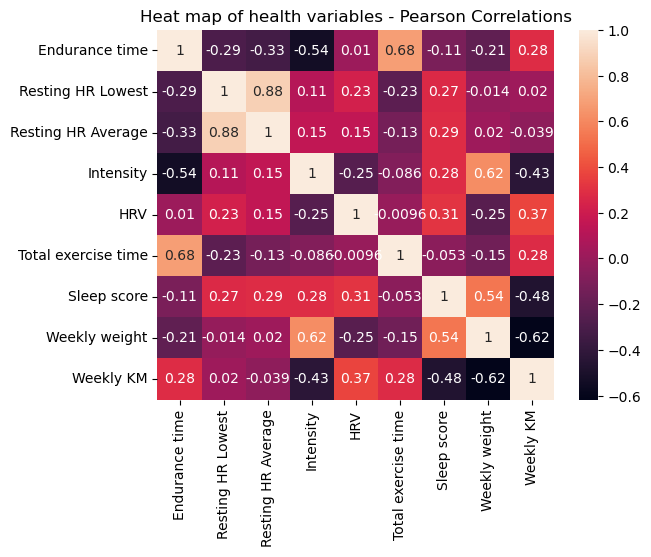

In [20]:
correlationColumns = ['Endurance time','Resting HR Lowest','Resting HR Average','Intensity', 'HRV','Total exercise time','Sleep score', 'Weekly weight', 'Weekly KM']
correlationWeeklyData = pd.DataFrame(list(zip(weeklyTimeEndurance, weeklyRestingHRLowest, weeklyRestingHRAverage, weeklyIntensity, weeklyHRV, weeklyTotalTime, weeklySleep, weeklyWeight, weeklyKM)), columns=correlationColumns)
plt.figure()
correlationWeekly = correlationWeeklyData.corr()
sns.heatmap(correlationWeekly, annot=True).set(title='Heat map of health variables - Pearson Correlations')

Heatmap for correlations of weekly data instead of daily data as in the previous heatmap. Notable correlations and differences compared to the previous heatmap: In absolute value a stronger positive correlation between resting HR and exercise HR (for previous heatmap this had zero to weakly negative correlation). The inverse correlation between lower resting HR and endurance time is not due to fitness adaptations but temporary fatigue on the system - weekly average data gives a much clearer picture of this compared to the daily correlation data. Intensity has a negative correlation with endurance time since higher intensity sessions tends to be shorter than low intensity sessions. Moreover, the positiv correlation between resting HR and sleep score and HRV and sleep score indicates they are all connected to recovery, although this could already be included in the Oura-ring algortihm, making this results bias. Weight has some interesting correlations. Weight and intensity; strong positive correlation - further strengthen the conclusions from previous correlation plot. Weight and sleep score has a positive correlation, indicating an aduquate amount of food and fluid is important for sleep quality or this is a result of eating and sleeping more during the weekends. Worth noting is that there is a much stronger negative correlation between weekly average weight and weekly KM than between weight and total exercise time, probably due to the total time depends to a higher degree on less demanding activities such as stretching. Positive correlation between intensity and weight - in line with conclusions from previous correlation plot.

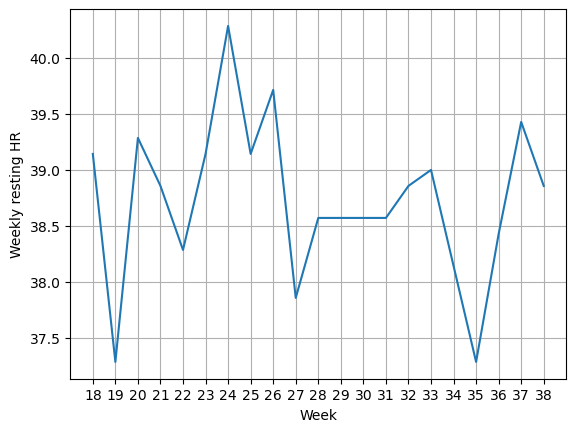

In [21]:
plt.figure()
plt.ylabel("Weekly resting HR")
plt.xlabel("Week")
plt.plot(weekNumber, weeklyRestingHRLowest)  
plt.xticks(weekNumber)
plt.grid()   

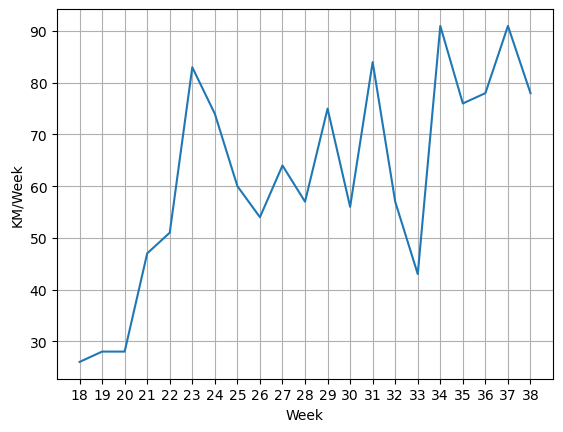

In [22]:
plt.figure()
plt.ylabel("KM/Week")
plt.xlabel("Week")
plt.plot(weekNumber, weeklyKM)
plt.xticks(weekNumber)
plt.grid()

Clear increase in KM/week - mostly due to injury but also as I become more serioes with the training again. 

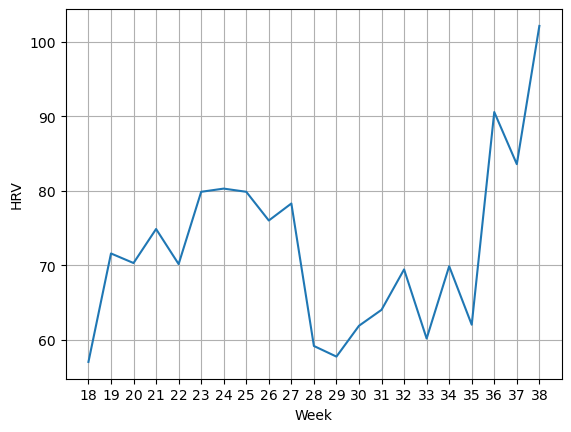

In [23]:
plt.figure()
plt.ylabel("HRV")
plt.xlabel("Week")
plt.plot(weekNumber, weeklyHRV)
plt.xticks(weekNumber)
plt.grid()

Less sleep during the middle weeks due to extreme summer heat, also more to do at work. 

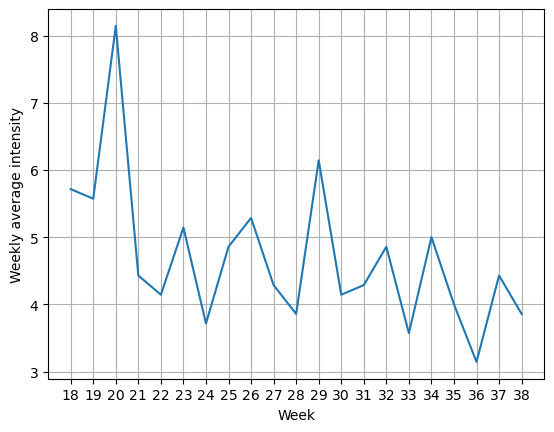

In [24]:
plt.figure()
plt.ylabel("Weekly average intensity")
plt.xlabel("Week")
plt.plot(weekNumber, weeklyIntensity)
plt.xticks(weekNumber)
plt.grid()

The weekly intensity tends to cykle; both due to how I construct my training program and as a consequence of fatigue from the training - try to think in two-week cykles instead of one-week cykles. 

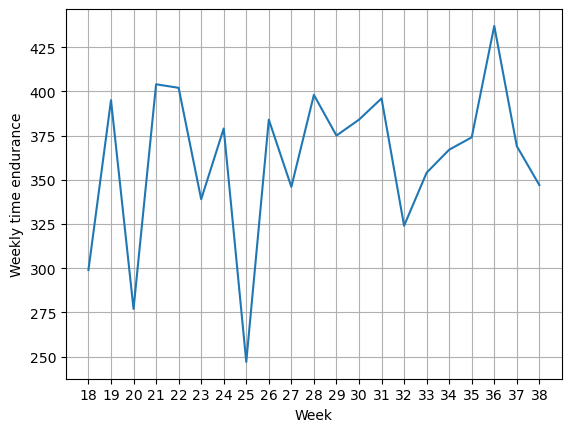

In [25]:
plt.figure()
plt.ylabel("Weekly time endurance")
plt.xlabel("Week")
plt.plot(weekNumber, weeklyTimeEndurance) 
plt.xticks(weekNumber)
plt.grid()

Steady compared to changes of weekly KM, alternative training tends to take more time. Also as I become more serious, i.e less non-specific running activity such as Hike or tennis (that can add a lot of endurance time in low zones) and more running the total load increases but is not reflected here. This is due to my model specifications. 

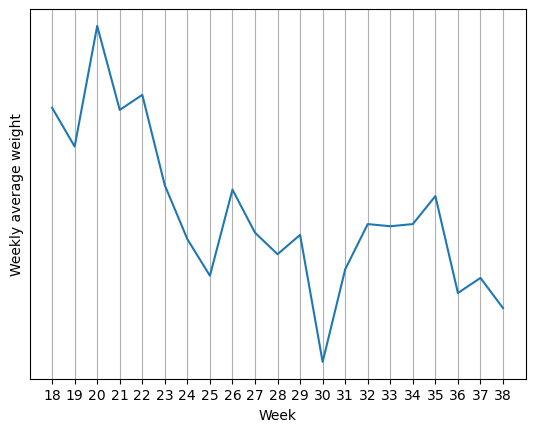

In [26]:
plt.figure()
plt.ylabel("Weekly average weight")
plt.xlabel("Week")
plt.plot(weekNumber, weeklyWeight) 
plt.xticks(weekNumber)
plt.yticks([])
plt.grid()

As the training got more serious with more running and overall focus on endurance instead of endurance, tennis and strength the weight decreased - as expected

In [27]:
from scipy.stats import norm


dataLengthRestingHR = len(restingHRLowest)
firstDistributionRestingHR = restingHRLowest[:round(dataLengthRestingHR/2)]
secondDistributionRestingHR = restingHRLowest[round(dataLengthRestingHR/2):]
rangeFirstDistbutionRestingHR = int(1+max(firstDistributionRestingHR) - min(firstDistributionRestingHR))
rangeSecondDistributionRestingHR = int(1+max(secondDistributionRestingHR) - min(secondDistributionRestingHR))

    
xHRFirst = np.linspace(min(firstDistributionRestingHR), max(firstDistributionRestingHR), 100)
HRNormalDistributionFitFirst = norm.pdf(xHRFirst, firstDistributionRestingHR.mean(), firstDistributionRestingHR.std())
  
xHRSecond = np.linspace(min(secondDistributionRestingHR), max(secondDistributionRestingHR), 100)
HRNormalDistributionFitSecond = norm.pdf(xHRSecond, secondDistributionRestingHR.mean(), secondDistributionRestingHR.std())

Text(0.5, 0, 'Resting HR')

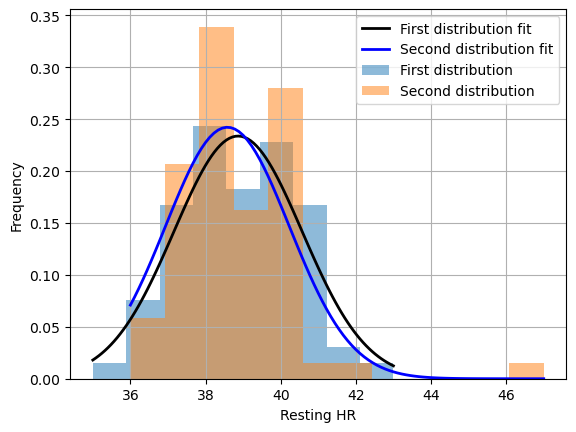

In [28]:
plt.figure()
plt.plot(xHRFirst, HRNormalDistributionFitFirst, 'k', linewidth=2, label = "First distribution fit")
plt.plot(xHRSecond, HRNormalDistributionFitSecond, 'b', linewidth=2, label = "Second distribution fit")

ax = firstDistributionRestingHR.plot.hist(bins=rangeFirstDistbutionRestingHR, density = True, alpha=0.5, label="First distribution")
ax = secondDistributionRestingHR.plot.hist(bins=rangeSecondDistributionRestingHR, density = True, alpha=0.5, label="Second distribution")
plt.legend()
plt.grid()
plt.xlabel("Resting HR")

To see if there actually has been any changes in resting HR and adaptations to the heart muscle during the given time period I decided to compare the distribution of resting HR but splitting the time period in two. When only looking at individual days or even individual weeks its hard to draw conculsions from the resting HR data since its influenced by so many factors that generates high daily and weekly variation, i.e: training load, sickness, sleep, stress. One bad night can provide off results for the whole week. Thus by splitting the data and comparing their distributions we get a more reliable view. Additionally these training adaptations for the heart takes time, hence daily and/or weekly data does not provide sufficiently accurate results. We can see that the mean has shifted slightly to the left (lower resting HR) which is positive, the bins are to large (one bin per beat/min) to draw any conclusions of the standard devation of the distribution. 

In [29]:
dataLengthWeight = len(weight)
firstDistributionWeight = weight[0:round(dataLengthWeight/2)]
secondDistributionWeight = weight[round(dataLengthWeight/2):]
rangeFirstDistbutionWeight = int(1+max(firstDistributionWeight) - min(firstDistributionWeight))
rangeSecondDistributionWeight = int(1+max(secondDistributionWeight) - min(secondDistributionWeight))

xWeightFirst = np.linspace(min(firstDistributionWeight), max(firstDistributionWeight), 100)
weightNormalDistributionFitFirst = norm.pdf(xWeightFirst, firstDistributionWeight.mean(), firstDistributionWeight.std())

xWeightSecond = np.linspace(min(secondDistributionWeight), max(secondDistributionWeight), 100)
weightNormalDistributionFitSecond = norm.pdf(xWeightSecond, secondDistributionWeight.mean(), secondDistributionWeight.std())

Text(0.5, 0, 'Weight [kg]')

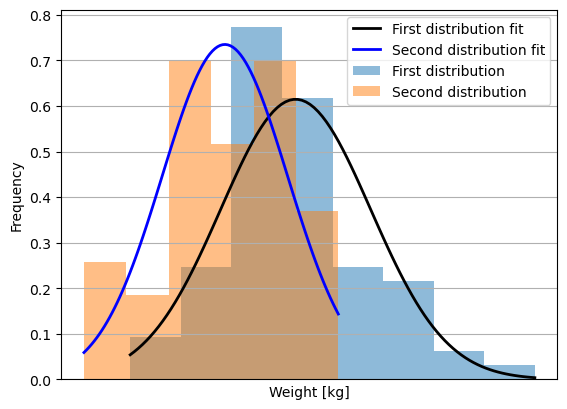

In [30]:
plt.figure()
plt.plot(xWeightFirst, weightNormalDistributionFitFirst, 'k', linewidth=2, label = "First distribution fit")
plt.plot(xWeightSecond, weightNormalDistributionFitSecond, 'b', linewidth=2, label = "Second distribution fit")

ax = firstDistributionWeight.plot.hist(bins=rangeFirstDistbutionWeight*2, alpha=0.5, density=True, label="First distribution")
ax = secondDistributionWeight.plot.hist(bins=rangeSecondDistributionWeight*2, alpha=0.5, density=True,label="Second distribution")

plt.grid()
plt.legend()
plt.xticks([])
plt.xlabel("Weight [kg]")

Changes in weight distribution follows the same pattern as the previous scatter plot for the weight changes over the time period.